# Project
# InstaBot - Part 2

## Necessary Imports:

#### Note : All sleep and wait times are according to my network and processor speed so please consider it if the functions or excutions take more time

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
from collections import OrderedDict 
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

service = Service(executable_path = 'G:\coding ninjas notes\files')
driver = webdriver.Chrome(service = service)

# Some Necessary Functions :

In [7]:
# Following is a function to login to the instagram account using username and password
# It takes two arguments :
# insta_username - instagram username
# insta_password - intagram password

def instagram_login(insta_username, insta_password) :
    
    driver.get('https://www.instagram.com/')
    driver.maximize_window()
    #wait
    userbox = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'username')))
    userpass = driver.find_element(By.NAME, 'password')

    userbox.send_keys(insta_username)
    userpass.send_keys(insta_password)

    btn = driver.find_element(By.TAG_NAME, 'button')
    btn.submit()
    # wait
    not_now = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class = "_ac8f"]')))
    not_now.click()
    
    notification = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_a9-z"]/button[2]')))
    notification.click()
    return

In [8]:
# Execution of function
instagram_login('SAMPLE_USERNAME', 'SAMPLE_PASSWORD')

In [9]:
# following is a function to search something in the instagram's search tab
# it takes one argument "word" which is to be searched or which the user want to search

def instagram_search(word) :
    
    try:
        # check if search tab is open
        search_tab = driver.find_element(By.CLASS_NAME, '_aaw6')
        # clearing the search box if something is written
        clear = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_9-lv')))
        clear.click()
        
    except NoSuchElementException :
        # if search tab is not open then opening it
        search = driver.find_elements(By.XPATH, "//div[@class = 'x1n2onr6']/a/div")
        search[1].click()
        time.sleep(2)
    
    # finding the search box element
    search_box = driver.find_element(By.CLASS_NAME, '_aauy')
    # sending or typing the required keyword to be searched
    search_box.send_keys(word)
    return

In [10]:
# Following is a function to fetch the results of a search i.e when we search something then the 
# results that comes below the search box is fetched by this function.
# It takes one argument "search_word" which is the word to be searched and whose result is to be fetched
# Note : Xpath is changing after some days so please consider this situation

def search_result(search_word) :
    # calling function first to search the required word
    instagram_search(search_word)
    # following is the xpath for the first element of the result of the above search word
    path1 = "/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div[2]/div/div[1]/a/div/div/div/div[2]/div/div/span[1]/span"
    #waiting for the elements to come
    wait = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, path1)))

    names = []
    i = 1
    
    # loop to extract all the elements excluding the ones with hashtags
    while True:
        try:
            j = str(i)
            path2 = "/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div[2]/div/div[" + j + "]/a/div/div/div/div[2]/div/div/span[1]/span"
            elem = driver.find_element(By.XPATH, path2)
            if elem.text != '' and elem.text[0] != '#':
                names.append(elem.text)
            i = i + 1
        except NoSuchElementException:
            break
    return names

In [11]:
# Following is a function to open an instagram's profile
# It takes one argument "profile_name" which is to be opened

def open_insta_profile(profile_name):
    
    # following try catch block checks if the profile is already opened or not if it is already open then
    # reopening will not done thus saving time
    try:
        # finding the heading tag enclosing the profile name which show that the profile is open or not
        # if heading tag is present then the enclosing text is matched with the required profile name
        # if the text matches then the profile is already opened else not
        find = driver.find_element(By.XPATH, '//h2[contains(@class, "x1lliihq")]')
        txt = ''
        profile = profile_name.lower().split(' ')
        for i in profile :
            txt += i
        if find.text == txt:
            return
        else:
            raise NoSuchElementException
        
    # if profile is not opened the program jumps to here
    except NoSuchElementException :
        
        instagram_search(profile_name)
        time.sleep(3)
        
        # since href is non changing attribute thats why the advantage of it is taken
        h = ''
        profile = profile_name.lower().split(' ')
        for i in profile:
            h += i
        href = "/" + h + "/"
        path3 = "//a[@href = '"+ href +"']"

        name = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, path3)))
        time.sleep(3)
        name.click()
        btn = driver.find_element(By.XPATH, '//main[contains(@class, "x78zum5")]')
        btn.click()
    return

# Problem-1 :

## Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [12]:
# Following Function 'find_top_handles' finds the top 'count (here 5)' instagram 
# handles which have the Maximum Followers count 
# it takes two arguments :
# 1. names_list - list of all the profiles among which top 5 is to be found
# 2. count - Number of top profiles to be found (here top 5) 

# Note : I have used driver.get(url) function (inside 1st loop) because while normally 
# opening the profiles (by opening the search tab and then typing and opening 
# the respective profile) there were a lot of issues coming.

def find_top_handles(names_list, count) :
    
    dct = {}
    # It is asked in the question to use first 10 handles
    for i in names_list[:10] :
        driver.get("https://www.instagram.com/"+i+"/")
        follower = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_ac2a')))[1]
        follower_cnt = int(follower.get_attribute('title').replace(',', ''))
        dct[i] = follower_cnt

    cnt = 0
    res = OrderedDict()
    for i in sorted(dct, key=dct.get, reverse=True):
        res[i] = dct[i]
        cnt += 1
        if(cnt >= count) : 
            break
    
    return res

In [65]:
# Execution of functions

names_list = search_result("food")
top_handles = find_top_handles(names_list, 5)
print("Top 5 Handles with highest Number of followers are : ")
for i in top_handles:
    print(i, " (", top_handles[i], "followers )")

### 2. Now Find the number of posts these handles have done in the previous 3 days.

In [14]:
# Following function finds the number of posts Done by a handle in the previous 'days_count'
# days (here 3 days)
# takes Number of previous days as argument

def count_posts(days_count) :
    
    first_post = driver.find_element(By.CLASS_NAME, "_aagw")
    first_post.click()
    
    cnt = 0
    now = datetime.now()
    while True:
    
        raw_date = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_aaqe')))
        date_string = raw_date.get_attribute('datetime')
        date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
        days = (now - date).days
        if days > days_count:
            break
        else :
            cnt += 1

        btn = driver.find_element(By.CLASS_NAME, '_aaqg')
        btn.click()
        
    close = driver.find_element(By.XPATH,'/html/body/div[2]/div/div/div[3]/div/div/div[1]/div/div[2]/div')
    close.click()
        
    return cnt

In [15]:
# Execution of function

posts_count = {}
for i in top_handles:
    driver.get("https://www.instagram.com/"+i+"/")
    time.sleep(5)
    posts = count_posts(3)
    posts_count[i] = posts

In [16]:
print("Number Of Posts that is uploaded by the top handles in 3 days are : ")
for i in posts_count:
    print(i, ":", posts_count[i])

Number Of Posts that is uploaded by the top handles in 3 days are : 
dilsefoodie : 6
foodtalkindia : 3
food : 0
food_lunatic : 3
delhifoodguide : 0


### 3. Depict this information using a suitable graph.

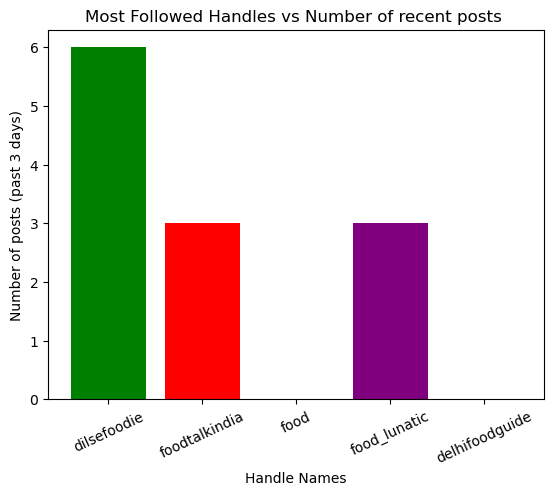

In [18]:
x = posts_count.keys()
y = posts_count.values()
colors = ['green', 'red', 'blue', 'purple', 'orange']
plt.bar(x,y,color=colors)
plt.ylabel("Number of posts (past 3 days)")
plt.xlabel("Handle Names")
plt.xticks(rotation = 25)
plt.title('Most Followed Handles vs Number of recent posts ')
plt.show()

# Problem-2:

## Your friend also needs a list of hashtags that he should use in his posts.

### 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [19]:
# Following Function is to scrape or extract all the hashtags from a particular number of posts
# done by several handles
# It takes two parameters as arguments :
# 1. top_handles - dictionary or list containing the top handles names
# 2. no_of_posts - Number of posts to be scraped

def scrape_words(top_handles, no_of_posts) :
    
    hashtags = []
    for i in top_handles:
        driver.get("https://www.instagram.com/"+i+"/")
        time.sleep(5)
        first_post = driver.find_element(By.CLASS_NAME, "_aagw")
        first_post.click()
        
        for i in range(no_of_posts):
  
            try:
                hashtag = driver.find_elements(By.XPATH, '//div[@class = "_a9zs"]/h1/a')
                for i in hashtag:
                    if i.text[0] == '#':
                        hashtags.append(i.text)
                btn = driver.find_element(By.CLASS_NAME, '_aaqg')
                btn.click()
            except NoSuchElementException:
                break
                
    close = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div[3]/div/div/div[1]/div/div[2]/div/div')
    close.click()
    return hashtags

In [20]:
# Below two comments are because these were already calculated before :

# names_list = search_result("food")
# top_handles = find_top_handles(names_list, 5)

tags = scrape_words(top_handles, 10)
print(tags)

foodtalkindia
food_lunatic
foodisnirvana
tasty.foodrecipes
delhifoodguide
no_karma_food
food
dilsefoodie
foodie_flatlay
foodiesdelhite
delhieater
caarafood
reneechopra
foodbellydelites
foodiesince96
delhifoodblogger
runaway_foodies
delishdirection
foodconnectindia
komalchawlaofficial
foodelhi
yourfoodlab
foodporn
foodbloggerai
karanfoodfanatic
delhidelites
foodiliciousmoments
thisisdelhi
foodiebyheart2.0
foodpandaindia
food.finista
foodie_okhla
food_feels
foodmastarni
foodhallindia
whaaatislife
dillifoodjunkie
indianfoodfreak
foodiedelhiwali
delhi_foodaholic
foodchrome
back2basics_foods
foodbabyny
thelittlefoodjournal
insiderfood
thefoodcultt
sortedfood
delhitimes.food
foodinc.yumyumtree
delhifoodking
['#dilsefoodie', '#dilsecouple', '#foodie', '#food', '#ipl', '#cricket', '#dilsefoodie', '#nihari', '#kulcha', '#nonveg', '#lucknow', '#ramzan', '#dilsefoodie', '#dilsecouple', '#cholekulche', '#foodie', '#food', '#dilsefoodie', '#dilsecouple', '#foodie', '#vaisakhi', '#dilsefoodie', '#di

### 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [22]:
dct = {}

for i in tags:
    dct[i] = dct.get(i, 0) + 1

# this below list will be used further 
sortedHashtags = []

for i in sorted(dct, key = dct.get, reverse = True):
    sortedHashtags.append([i,dct[i]])

print("Names of Hashtags with their frequency : ")
for tag in dct :
    print(tag, ":", dct[tag])

Names of Hashtags with their frequency : 
#dilsefoodie : 9
#dilsecouple : 7
#foodie : 7
#food : 10
#ipl : 1
#cricket : 1
#nihari : 1
#kulcha : 1
#nonveg : 1
#lucknow : 1
#ramzan : 1
#cholekulche : 1
#vaisakhi : 1
#buffet : 1
#icecream : 1
#chaat : 2
#bhalle : 1
#vaishali : 1
#pavitdua : 1
#waheguru : 1
#springrolls : 1
#chinese : 1
#StreetIcons : 1
#delhi6 : 1
#bhandar : 1
#streetsnacks : 1
#foodtalkindia : 9
#foodiesofindia : 9
#foodblogger : 9
#delicious : 8
#yummy : 9
#instafood : 9
#discover : 9
#delhi : 3
#beers : 1
#brewery : 1
#ramadan : 1
#eid : 1
#feast : 1
#phirni : 1
#biryani : 1
#kebabs : 1
#tahini : 1
#middleastern : 1
#deliverykitchen : 1
#ftiinsider : 1
#coffee : 1
#cafe : 1
#mumbai : 1
#caffeine : 1
#drinks : 1
#anthem : 1
#agency : 1
#frozenmomos : 1
#momos : 1
#frozenfood : 1
#brands : 1
#INJA : 1
#Indian : 1
#Japanese : 1
#restaurant : 2
#pokebowls : 1
#flavours : 1
#KeepItOscar : 1
#oscarmayer : 1
#oscarmayerwienermobile : 1
#oscarmayerweiner : 1
#oscarmayercontest 

### 3. Create a csv file with two columns : the word and its frequency

In [23]:
# pandas function is used to convert list to pandas dataframe
# Then pandas function is used to convert the dataframe to csv file with provided name

df = pd.DataFrame(sortedHashtags, columns =["Words", "Frequency"]) 
df.reset_index(drop=True, inplace=True)
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#food,10
1,#dilsefoodie,9
2,#foodtalkindia,9
3,#foodiesofindia,9
4,#foodblogger,9
5,#yummy,9
6,#instafood,9
7,#discover,9
8,#delicious,8
9,#dilsecouple,7


### 4. Now, find the hashtags that were most popular among these bloggers

In [25]:
# sortedHashtags is a list of list containing the Hashtags name with their frequency arranged
# in decreasing order (this list is already computed before)

print("top 5 Most Popular Hashtags are : ")
for i in range(5) :
    print(sortedHashtags[i][0])

top 5 Most Popular Hashtags are : 
#food
#dilsefoodie
#foodtalkindia
#foodiesofindia
#foodblogger


### 5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

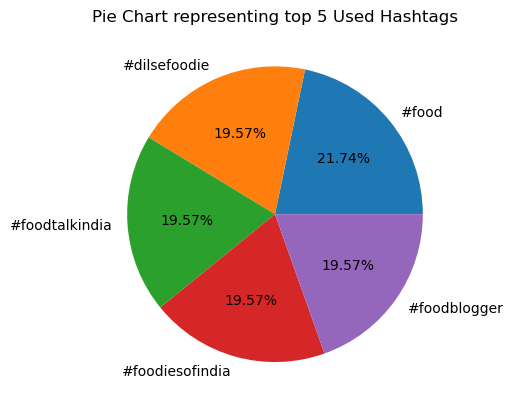

In [26]:
names = []
for i in range(5):
    names.append(sortedHashtags[i][0])
freq = []
for i in range(5):
    freq.append(sortedHashtags[i][1])
    
plt.pie(freq, labels = names, autopct='%0.2f%%')
plt.title("Pie Chart representing top 5 Used Hashtags")
plt.show()

# Problem-3:

## You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

### 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [31]:
# Following Function 'find_likes' finds the likes count on several instagram 
# handle's posts 
# it takes two arguments :
# 1. handle - list of all the profiles whose posts is to be scraped for likes count
# 2. no_of_posts - Number of posts to be scraped for likes count

# Note : I have used driver.get(url) function because while normally opening the profiles 
# (by opening the search tab and then typing and opening the respective profile) there were 
# a lot of issues coming.

def find_likes(handle, no_of_posts) :
    
    total_posts = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[2]/div[2]/section/main/div/header/section/ul/li[1]/span/span').text
    total_posts = int(total_posts.replace(',', ''))
    if(no_of_posts > total_posts) :
        print("argument 'no_of_posts' is greater than total posts")
        return
    
    handle_like = []
    driver.get("https://www.instagram.com/"+i+"/")
    time.sleep(5)
    first_post = driver.find_element(By.CLASS_NAME, "_aagw")
    first_post.click()

    while True:
        try:
            try:
                like_cnt = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div[3]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/span/a/span/span').text
                like_cnt = int(like_cnt.replace(',', ''))
            except NoSuchElementException:
                btn = driver.find_element(By.CLASS_NAME, '_aaqg')
                btn.click()
                continue
            handle_like.append(like_cnt)
            if len(handle_like) == no_of_posts:
                break
            btn = driver.find_element(By.CLASS_NAME, '_aaqg')
            btn.click()
        except NoSuchElementException:
            break
    return handle_like

In [32]:
# Excecution of Function

likes = {}

for i in top_handles:
    like_count = find_likes(i, 10)
    likes[i] = like_count
    print("Likes of ", i, ":")
    for j in like_count:
        print(str(j), "likes")

Likes of  dilsefoodie :
5061 likes
1539 likes
6831 likes
12258 likes
8935 likes
6236 likes
4651 likes
14956 likes
34317 likes
13915 likes
Likes of  foodtalkindia :
350 likes
610 likes
185 likes
523 likes
488 likes
607 likes
125 likes
507 likes
1156 likes
454 likes
Likes of  food :
164 likes
847 likes
215 likes
372 likes
883 likes
467 likes
89 likes
561 likes
601 likes
1008 likes
Likes of  food_lunatic :
428 likes
1739 likes
1791 likes
1714 likes
1027 likes
2052 likes
1424 likes
920 likes
1346 likes
1314 likes
Likes of  delhifoodguide :
250 likes
423 likes
785 likes
1032 likes
145 likes
495 likes
328 likes
296 likes
245 likes
1992 likes


### 2. Calculate the average likes for a handle.

In [33]:
# Since only 10 posts were asked to check therefore average is calculated as :
# average = total likes on 10 posts / 10 
# double forward slash '//' denotes integer division or floor division

avg_likes = {}
for i in likes :
    avg_likes[i] = sum(likes[i]) // 10

print("Average Likes for each Handle are : ")
for key,val in avg_likes.items() :
    print(key, ':', val)

Average Likes for each Handle are : 
dilsefoodie : 10869
foodtalkindia : 500
food : 520
food_lunatic : 1375
delhifoodguide : 599


### 3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [51]:
# Following function finds the average followers:like ratio of each handle
# It takes three arguments :
# 1. top_handles - dictionary containing top handles names and follower count
# 2. avg_likes - dictionary containing top handle names and average likes 
# 3. handle_name - list containing names of top handles

def find_avg_followers_like_ratio(top_handles, avg_likes, handle_name) :
    
    ratio = {}
    
    for i in range(len(handle_name)) :
        
        key = handle_name[i]
        val = top_handles[key] // avg_likes[key]
        
        ratio[key] = val
        
    return ratio

In [54]:
# Excecution of Function

handle_name = list(top_handles.keys())
ratio = find_avg_followers_like_ratio(top_handles, avg_likes, handle_name)

print('Average followers:like ratio of each handle is as follows :')
for handle in ratio :
    print(handle, ':', ratio[handle])

Average followers:like ratio of each handle is as follows :
dilsefoodie : 100
foodtalkindia : 619
food : 351
food_lunatic : 100
delhifoodguide : 167


### 4. Create a bar graph to depict the above obtained information.

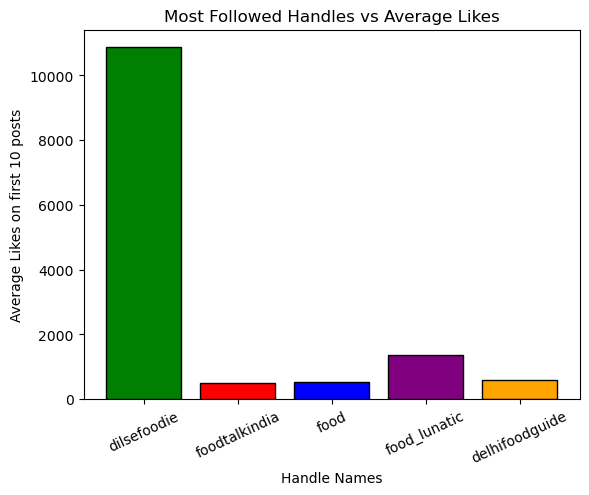

In [60]:
# Two Bar Graphs are represented here :
# 1. Most Followed Handles vs Average Likes
# 2. Most Followed Handles vs Followers to Likes ratio

handles = list(avg_likes.keys())
likes = list(avg_likes.values())

colors = ['green', 'red', 'blue', 'purple', 'orange']
plt.bar(handles,likes,color=colors, edgecolor='black')
plt.ylabel("Average Likes on first 10 posts")
plt.xlabel("Handle Names")
plt.xticks(rotation = 25)
plt.title('Most Followed Handles vs Average Likes')
plt.show()

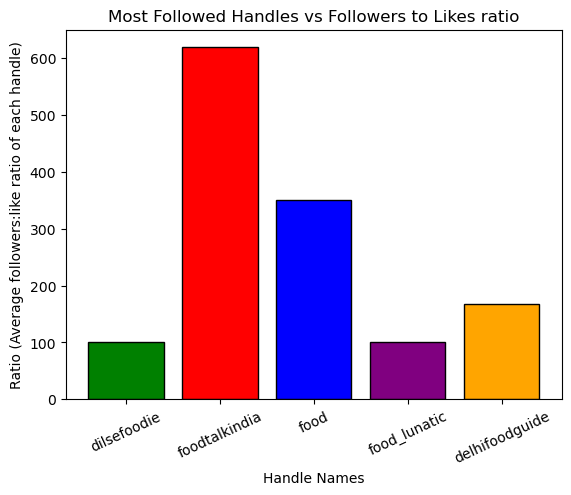

In [64]:
handles = list(ratio.keys())
ratios = list(ratio.values())

colors = ['green', 'red', 'blue', 'purple', 'orange']
plt.bar(handles,ratios,color=colors, edgecolor='black')
plt.ylabel("Ratio (Average followers:like ratio of each handle)")
plt.xlabel("Handle Names")
plt.xticks(rotation = 25)
plt.title('Most Followed Handles vs Followers to Likes ratio')
plt.show()

In [78]:
a = [96, 100, 106, 114]
sum(a)//len(a)

104